In [40]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Load csv
df = pd.read_csv('/Users/davidkim/Downloads/data_jobs.csv')

#Data cleaining
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda skills: ast.literal_eval(skills)
    if pd.notnull(skills) else skills)

In [49]:
#Filter for US Data Scientist jobs
df_DS_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()
df_DS_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,NaN,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
32,Data Scientist,Sr. Data Scientist (NLP) - Full-time / Part-time,"Dallas, TX",via Snagajob,Full-time,False,"Texas, United States",2023-03-13 13:07:03,False,True,United States,NaN,NaN,NaN,MCKESSON,"[python, azure, databricks, pyspark, pandas, h...","{'cloud': ['azure', 'databricks'], 'libraries'..."
40,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,NaN,NaN,NaN,Abbott,NaN,NaN
41,Data Scientist,Data Scientist I,"Paris, KY",via Jobs By Care,Full-time,False,Georgia,2023-11-13 14:59:39,False,False,United States,NaN,NaN,NaN,Appalachian Regional Healthcare,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."


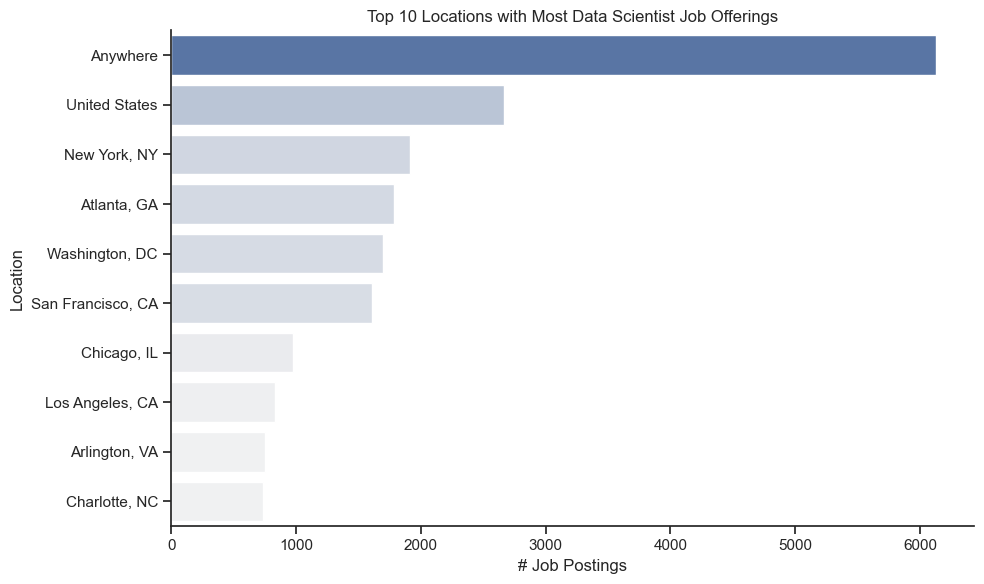

In [50]:
#Get top locations for Data Scientist jobs in the US
df_DS_US_top_loc = df_DS_US['job_location'].value_counts().head(10).to_frame()

#Create plot
plt.figure(figsize=(10,6))
sns.set_style(style='ticks')

#Visualize plot
sns.barplot(data = df_DS_US_top_loc, x='count', y='job_location', hue='count', palette='light:b')

#Label plot
sns.despine()
plt.title('Top 10 Locations with Most Data Scientist Job Offerings')
plt.xlabel('# Job Postings')
plt.ylabel('Location')
plt.legend().set_visible(False)

plt.tight_layout()
plt.show()


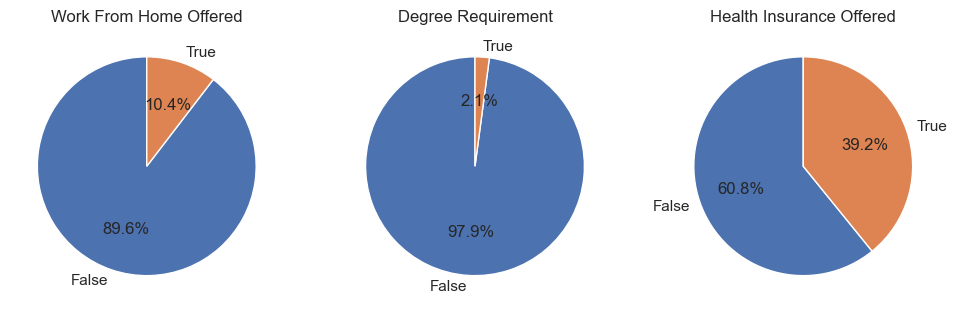

In [51]:
dict_columns = {
    'job_work_from_home' : 'Work From Home Offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offered'
}

#Create plot
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 6))

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df_DS_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

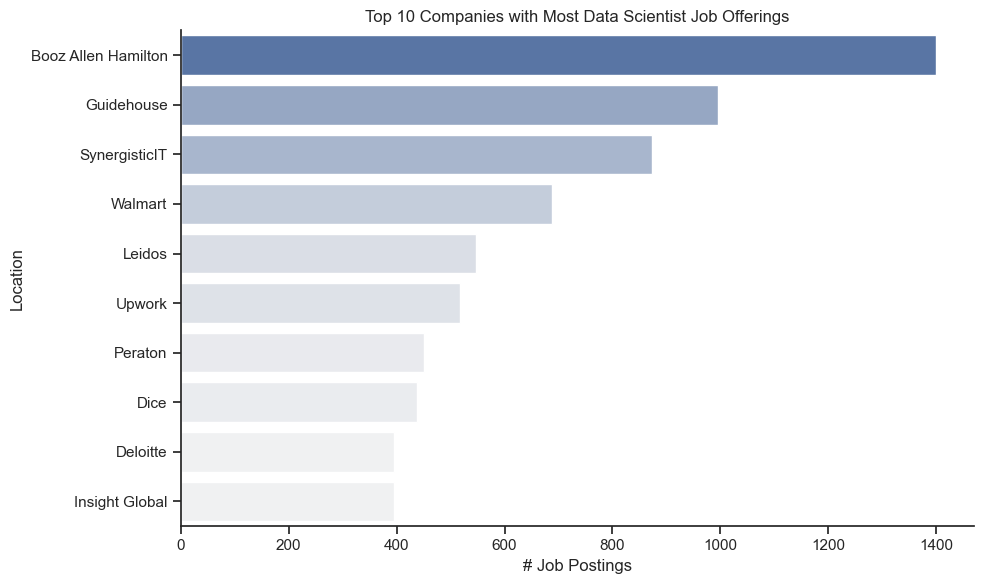

In [52]:
#Get top US companies with the most Data Scientist job postings
df_DS_US_top_loc = df_DS_US['company_name'].value_counts().head(10).to_frame()

#Create plot
plt.figure(figsize=(10,6))

#Visualize plot
sns.barplot(data = df_DS_US_top_loc, x='count', y='company_name', hue='count', palette='light:b')

#Label plot
sns.despine()
plt.title('Top 10 Companies with Most Data Scientist Job Offerings')
plt.xlabel('# Job Postings')
plt.ylabel('Location')
plt.legend().set_visible(False)

plt.tight_layout()
plt.show()
